Introducción

En el entorno competitivo actual, comprender a los clientes es fundamental para diseñar estrategias de marketing efectivas que aumenten la satisfacción del cliente y, en última instancia, los ingresos. Una de las herramientas más poderosas para lograr esto es la segmentación de clientes, que nos permite agrupar a los clientes en diferentes segmentos según sus características y comportamientos.

Problema:

Eres el propietario de un centro comercial y, a través de tarjetas de membresía, has recopilado datos básicos sobre tus clientes, como su edad, género, ingresos anuales y una puntuación de gasto asignada basada en su comportamiento de compra. Ahora, deseas entender quiénes son tus clientes objetivo para dirigir tus esfuerzos de marketing de manera más efectiva. El objetivo es identificar grupos de clientes con comportamientos y características similares para poder diseñar estrategias de marketing específicas para cada grupo.

Lo que Haremos en la Rutina:

Para abordar este problema, llevaremos a cabo una rutina de Análisis Exploratorio de Datos (EDA) y aplicaremos clustering para segmentar a los clientes en grupos homogéneos. La rutina incluye los siguientes pasos:

Importación de Datos y Exploración Inicial: Comenzaremos importando el conjunto de datos y realizando una inspección preliminar para comprender su estructura y características clave.

Recodificación de Variables: Convertiremos la variable Gender en una variable numérica binaria, lo que nos permitirá incluirla en los análisis posteriores.

Visualización de Distribuciones: Exploraremos las distribuciones de las principales características (edad, ingresos anuales y puntuación de gastos) para identificar patrones, valores atípicos y sesgos en los datos.

Exploración de Relaciones Entre Características:

Crearemos gráficos de dispersión para analizar cómo se relacionan las características clave entre sí, lo que nos ayudará a descubrir posibles segmentos de clientes.

Preparación de Datos para Clustering:

Estandarizaremos las características seleccionadas para asegurarnos de que todas contribuyan equitativamente al análisis de clustering.

Aplicación de K-Means Clustering:

Utilizaremos el algoritmo de K-Means para agrupar a los clientes en clusters basados en sus características. Analizaremos los centros de los clusters para entender mejor los segmentos resultantes.

Análisis e Interpretación de Clusters:

Finalmente, interpretaremos los resultados del clustering para identificar los segmentos de clientes más relevantes y discutir cómo se pueden utilizar estos segmentos para dirigir estrategias de marketing efectivas.

Resultado Esperado:

Al finalizar esta rutina, habremos identificado diferentes segmentos de clientes dentro del centro comercial, lo que permitirá desarrollar estrategias de marketing específicas para cada grupo. Esto no solo optimizará los esfuerzos de marketing, sino que también mejorará la satisfacción del cliente y potencialmente aumentará las ventas.

Link a Kaggle: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/data?select=Mall_Customers.csv

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# Abrir el dataset
df = pd.read_csv('https://raw.githubusercontent.com/SteffiPeTaffy/machineLearningAZ/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv', sep=',')

# Numero de Filas y Columnas
print(df.shape)

# Resumen del dataset
print(df.info())

# Primeras columnas
print(df.head())

# Parte inferior
print(df.tail())


(200, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
     CustomerID   Genre  Age  Annual Incom

Todos son numeros menos el genre

In [3]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [4]:
# Contemos si hay Id's duplicados
duplicate_ids = df[df.duplicated('CustomerID', keep=False)]['CustomerID'].nunique()
print(duplicate_ids)

0


In [5]:
df['Genre'].nunique()

2

In [6]:
# Recodifiquemos a una variable binaria
df['Gender'] = df['Genre'].map({'Male': 0, 'Female': 1})

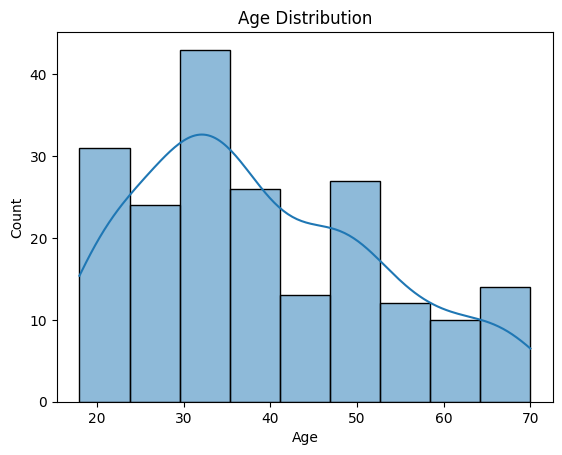

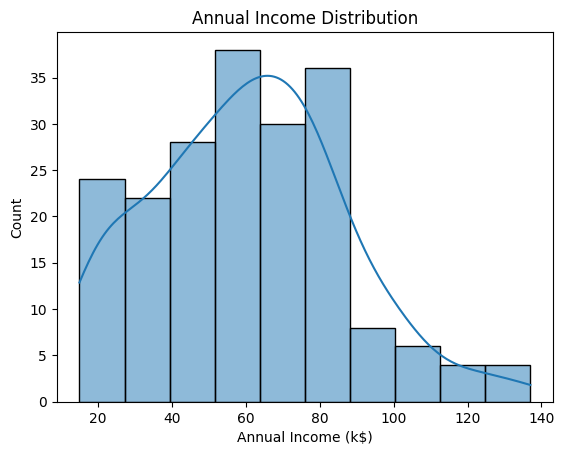

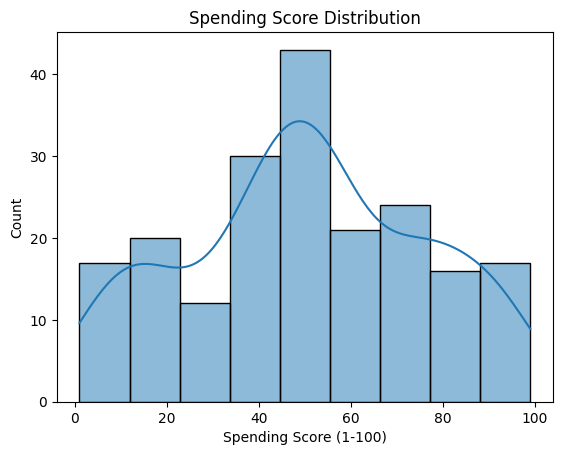

In [7]:
# Distribucion de Age
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

# Distribucion de Annual Income
sns.histplot(df['Annual Income (k$)'], kde=True)
plt.title('Annual Income Distribution')
plt.show()

# Distribucion de Spending Score
sns.histplot(df['Spending Score (1-100)'], kde=True)
plt.title('Spending Score Distribution')
plt.show()


De la distribución no hay mucho para decir porque no hay mucha cosa rara.

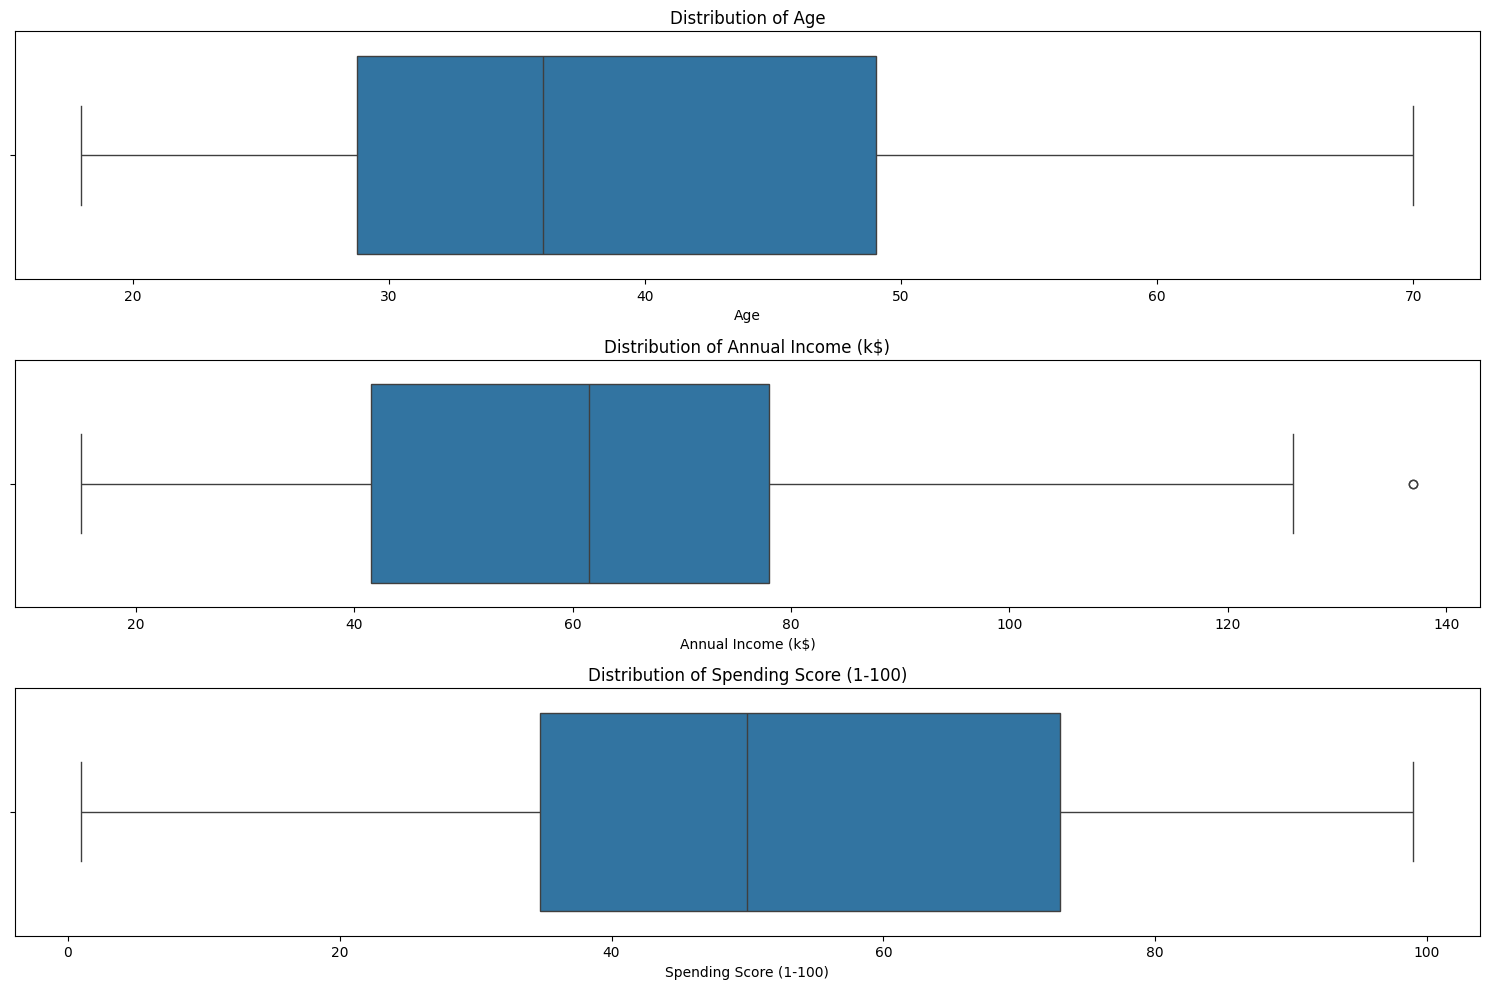

In [8]:
# Veamos si hay outliers
plt.figure(figsize=(15, 10))

for i, col in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)']):
    plt.subplot(3, 1, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


Por qué lo hacemos: Visualizar la distribución de las variables clave como Age, Annual Income, y Spending Score nos ayuda a entender mejor los datos y detectar posibles sesgos, valores atípicos o patrones.

Qué podemos decir de estas distribuciones? No podemos decir mucho. No parece haber nada malo


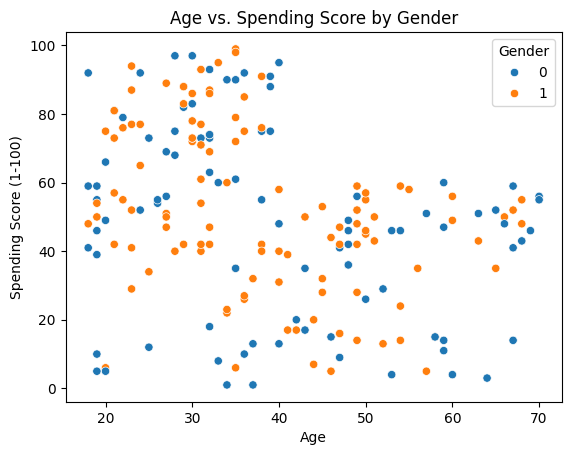

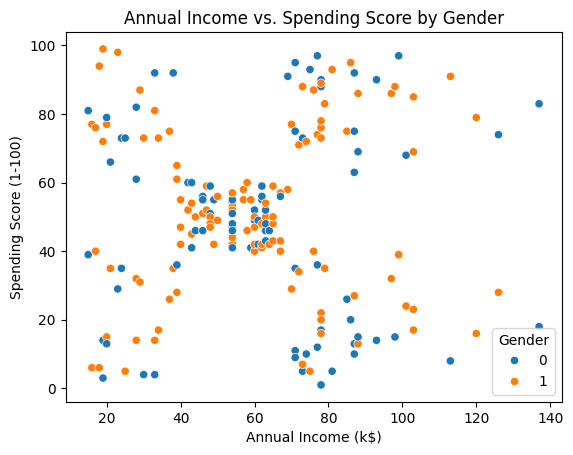

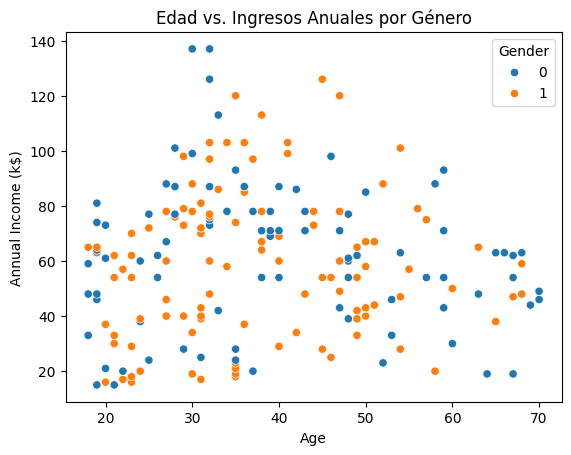

In [9]:
# Relacion entre Age y Spending Score
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Gender', data=df)
plt.title('Age vs. Spending Score by Gender')
plt.show()

# Relacion entre Annual Income y Spending Score
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=df)
plt.title('Annual Income vs. Spending Score by Gender')
plt.show()

# Relación entre Edad e Ingresos Anuales
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Gender', data=df)
plt.title('Edad vs. Ingresos Anuales por Género')
plt.show()

Por qué lo hacemos: Las visualizaciones de dispersión entre pares de características pueden revelar relaciones o patrones importantes que son útiles para la segmentación de clientes.

¿Qué podemos decir de esto? La edad determina la posibilidad de tener spending score alto. Personas mayores no tienen spending score altos


In [10]:
# Seleccionar las características relevantes para el clustering (en este caso todas)
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']]

# Estandarizar las características
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Convertir las características estandarizadas de nuevo a un DataFrame
df_scaled = pd.DataFrame(features_scaled, columns=features.columns)
print(df_scaled.head())


        Age  Annual Income (k$)  Spending Score (1-100)    Gender
0 -1.424569           -1.738999               -0.434801 -1.128152
1 -1.281035           -1.738999                1.195704 -1.128152
2 -1.352802           -1.700830               -1.715913  0.886405
3 -1.137502           -1.700830                1.040418  0.886405
4 -0.563369           -1.662660               -0.395980  0.886405


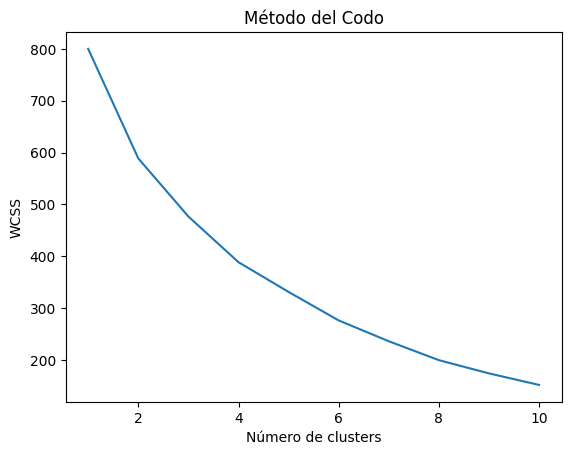

In [11]:
# Determinar el número óptimo de clusters usando el método del codo
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Graficar el método del codo
plt.plot(range(1, 11), wcss)
plt.title('Método del Codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')  # Suma de cuadrados intra-cluster
plt.show()


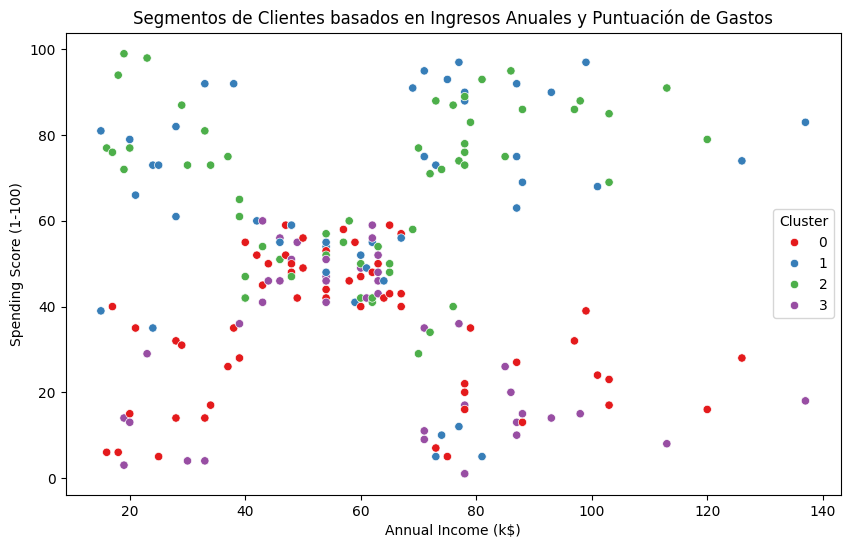

In [12]:
# Aplicar K-Means con el número de clusters elegido (por ejemplo, 4)
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualizar los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='Set1')
plt.title('Segmentos de Clientes basados en Ingresos Anuales y Puntuación de Gastos')
plt.show()


In [13]:
# Analizar los centros de los clusters
centers = scaler.inverse_transform(kmeans.cluster_centers_)
df_centers = pd.DataFrame(centers, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender'])
print(df_centers)

# Contar el número de clientes en cada cluster
print(df['Cluster'].value_counts())

# Analizar los valores promedio de las características en cada cluster
numeric_columns = df.select_dtypes(include=[np.number]).columns
cluster_analysis = df.groupby('Cluster')[numeric_columns].mean()
print(cluster_analysis)


         Age  Annual Income (k$)  Spending Score (1-100)  Gender
0  47.803571           58.071429               34.875000     1.0
1  28.000000           62.239130               64.826087     0.0
2  28.392857           60.428571               68.178571     1.0
3  52.738095           62.214286               30.642857     0.0
Cluster
0    56
2    56
1    46
3    42
Name: count, dtype: int64
         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                                      
0         93.214286  47.803571           58.071429               34.875000   
1        104.695652  28.000000           62.239130               64.826087   
2        101.910714  28.392857           60.428571               68.178571   
3        103.738095  52.738095           62.214286               30.642857   

         Gender  Cluster  
Cluster                   
0           1.0      0.0  
1           0.0      1.0  
2           1.0      2.0  
3    

Los clusters 0 y 2 son de hombres. El 1 y el 3 solo de mujeres. Los clustes 1 y 2 son de jovenes y de score alto. El 0 y el 3 de personas mayores y score bajo (tendríamos que investigar si lo que determina que se esté en estos clusters en que la persona sea mayor o que tenga el score bajo?)

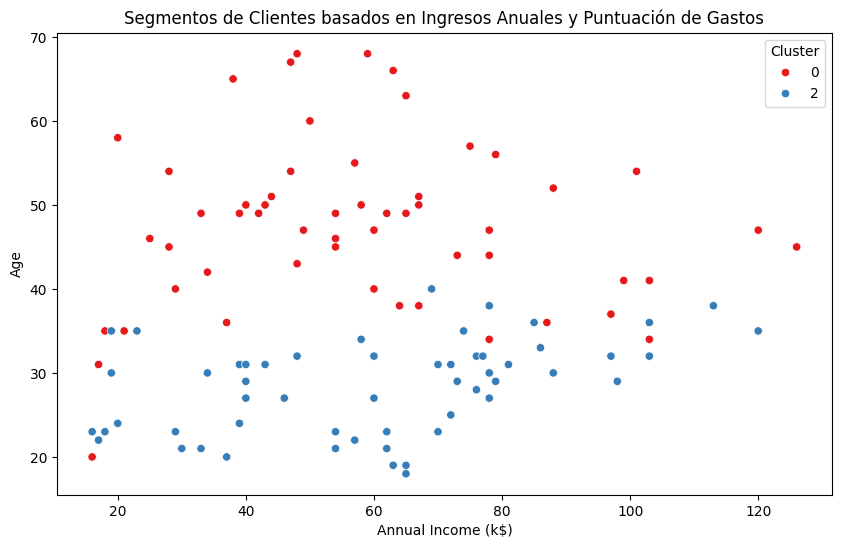

In [14]:
# Visualizar los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Age', hue='Cluster', data=df[df['Gender']==1], palette='Set1')
plt.title('Segmentos de Clientes basados en Ingresos Anuales y Puntuación de Gastos')
plt.show()

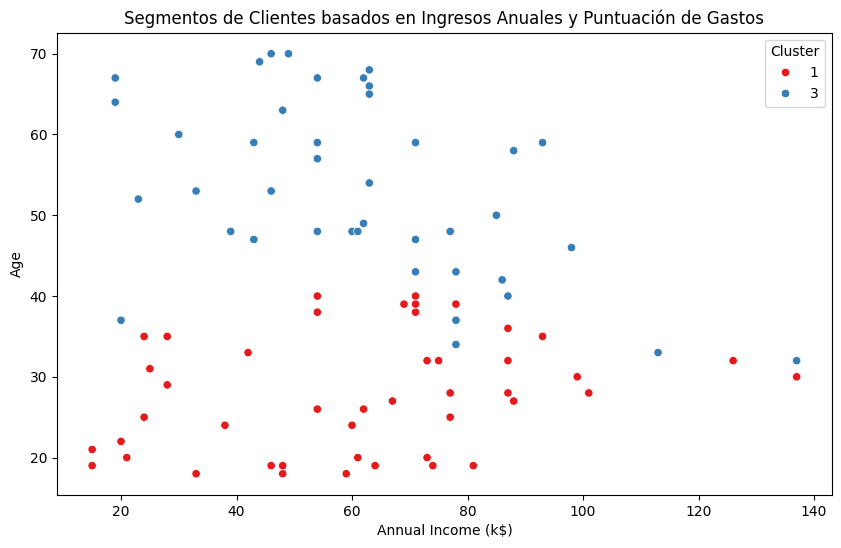

In [15]:
# Visualizar los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Age', hue='Cluster', data=df[df['Gender']==0], palette='Set1')
plt.title('Segmentos de Clientes basados en Ingresos Anuales y Puntuación de Gastos')
plt.show()

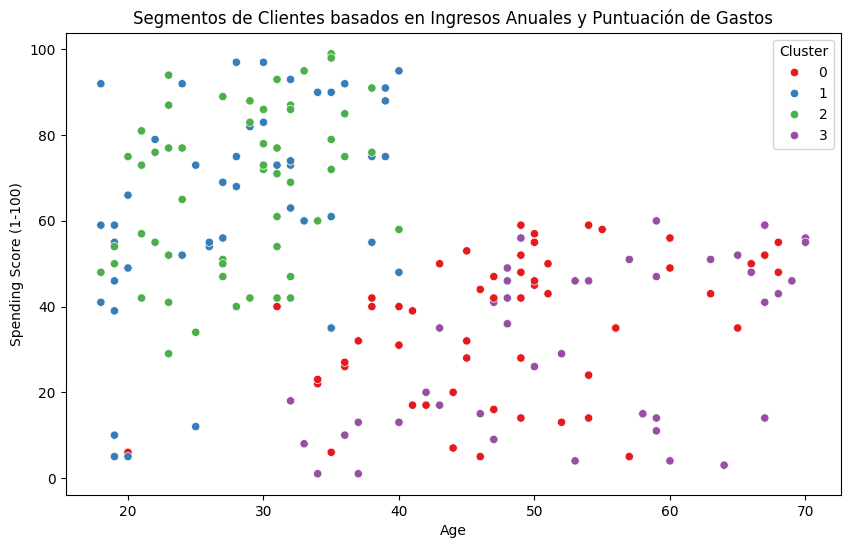

In [16]:
# Aplicar K-Means con el número de clusters elegido (por ejemplo, 4)
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualizar los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Cluster', data=df, palette='Set1')
plt.title('Segmentos de Clientes basados en Ingresos Anuales y Puntuación de Gastos')
plt.show()


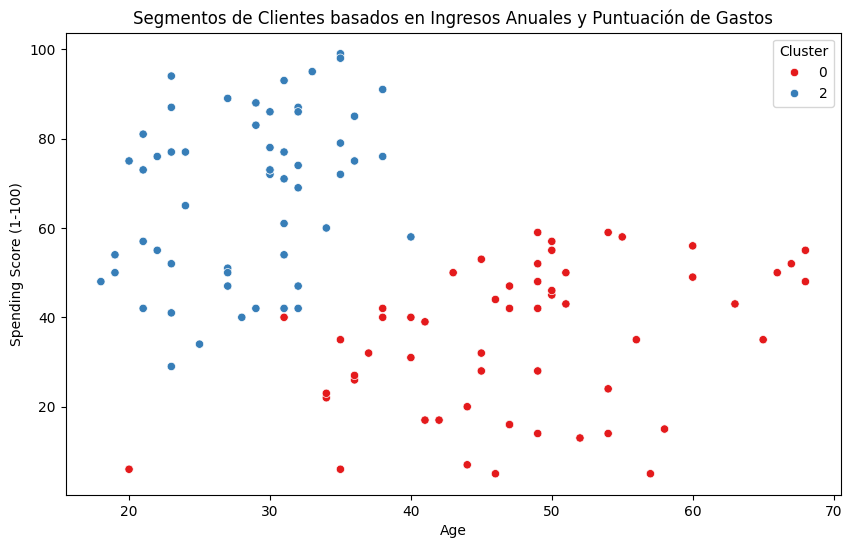

In [17]:
# Aplicar K-Means con el número de clusters elegido (por ejemplo, 4)
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualizar los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Cluster', data=df[df['Gender']==1], palette='Set1')
plt.title('Segmentos de Clientes basados en Ingresos Anuales y Puntuación de Gastos')
plt.show()


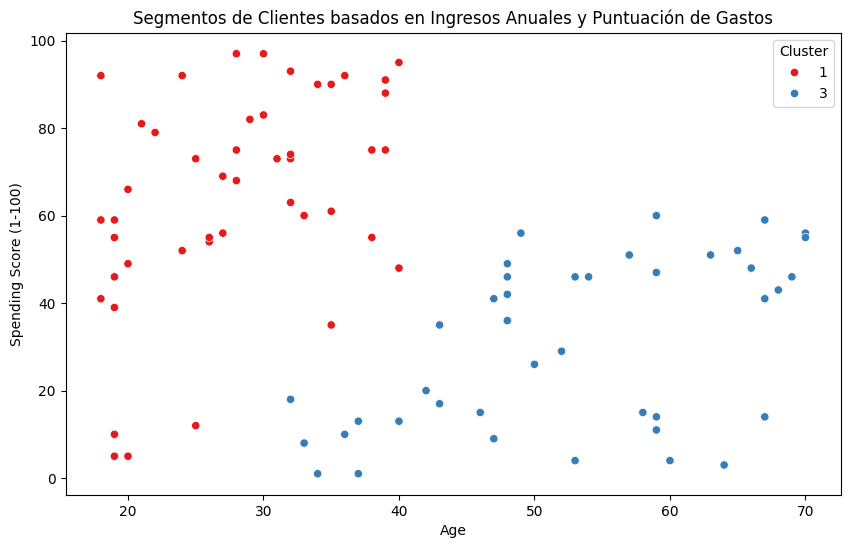

In [18]:
# Aplicar K-Means con el número de clusters elegido (por ejemplo, 4)
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualizar los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Cluster', data=df[df['Gender']==0], palette='Set1')
plt.title('Segmentos de Clientes basados en Ingresos Anuales y Puntuación de Gastos')
plt.show()


Clase 5


Generando Pair Plot para visualizar relaciones entre variables:


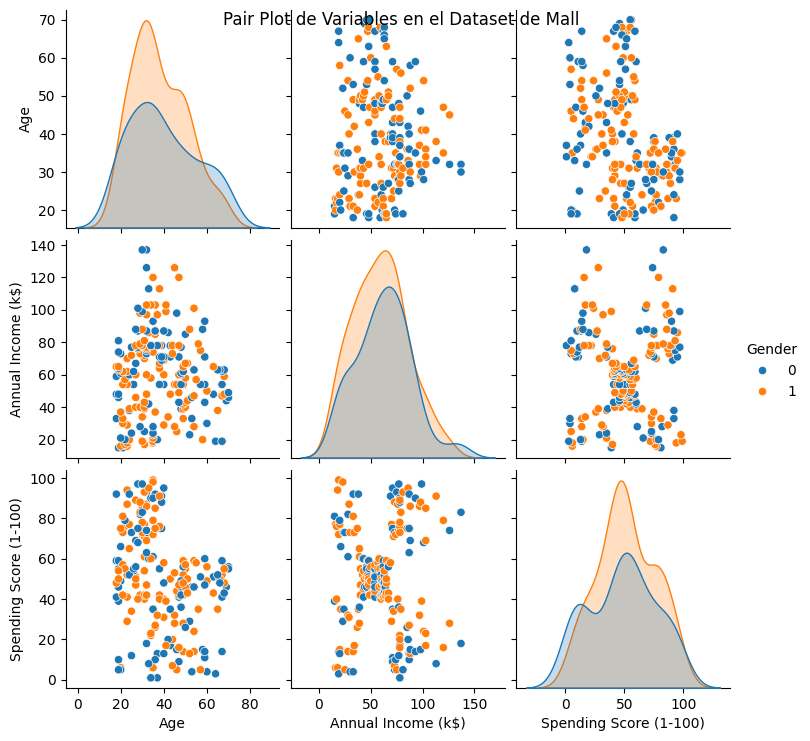

In [19]:
# Pair Plot para visualizar relaciones entre todas las variables - DENSIDADES
print("\nGenerando Pair Plot para visualizar relaciones entre variables:")
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']], hue='Gender', diag_kind='kde')
plt.suptitle('Pair Plot de Variables en el Dataset de Mall')
plt.show()

- 0 es hombre
- 1 es mujer




El objetivo es:
1. Densidad (distribucion univariada)
2. Correlaciones (o patrones bivariados)

Y esto es lo que vemos:
1. No hay ningún patrón que emerja en términos de diferenciar hombres y mujeres.
2. Para Edad alta, el spending score no puede es muy alto.
3. Entre Annual Income y Spending Score, hay una concentración de puntos alrededor del centro de ambas distribuciones.

De las densidades/histogramas:
1. En edades más altas, hay más hombres que mujeres (y al revés). Eso se ve bien en el histograma (abajo), que para las franjas mayores hay mas azules.
2. En spending scores muy altos hay más hombres.

En las densidades, la interpretación es la derivada de la F grande.


Generando Pair Plot para visualizar relaciones entre variables:


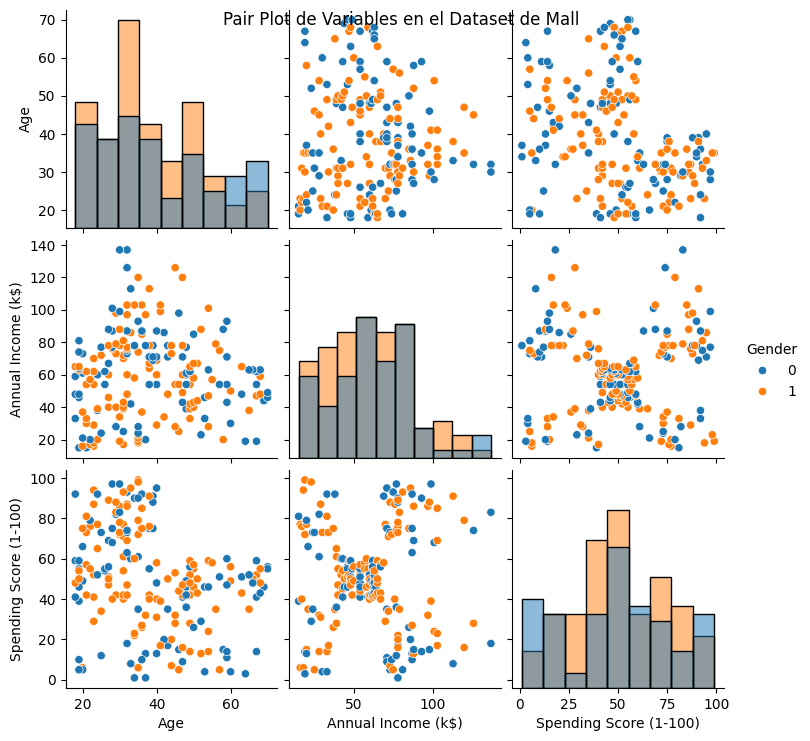

In [19]:
# Pair Plot para visualizar relaciones entre todas las variables - HISTOGRAMAS
print("\nGenerando Pair Plot para visualizar relaciones entre variables:")
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']], hue='Gender', diag_kind='hist')
plt.suptitle('Pair Plot de Variables en el Dataset de Mall')
plt.show()

En los histogramas, el gris es la intersección del naranaja con el azul. Y el que sobresale es el que tiene mas.

El pico de mujeres que hay en la última gráfica en 50 del Spending Score, es que para las mujeres alrededor de 50 hay mas observaciones para las mujeres que para los hombres. La única interpretación de ese punto es que cuando el Spending Score es 50, hay más mujeres que hombres.

In [20]:
import numpy as np


Generando Matriz de Correlación:


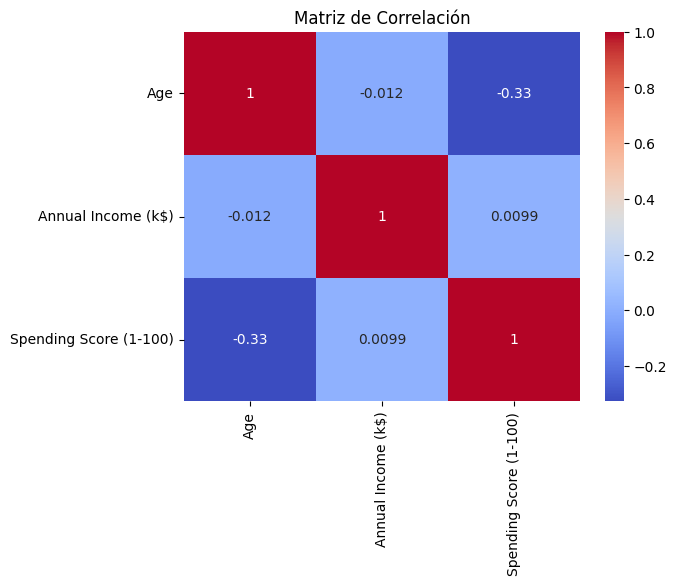

In [21]:
# Filtrar solo las columnas numéricas
numeric_df = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].select_dtypes(include=[np.number])

# Matriz de Correlación para identificar relaciones lineales entre variables numéricas
print("\nGenerando Matriz de Correlación:")
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


Generando Matriz de Correlación para mujeres:


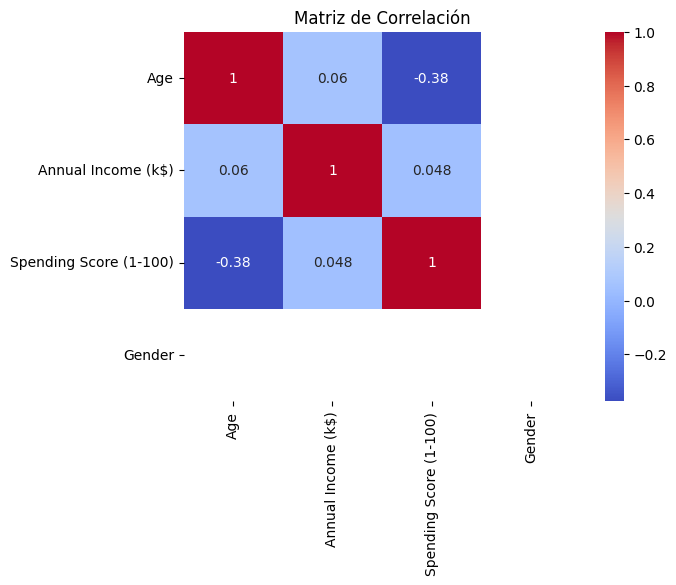

In [22]:
# Filtrar solo las columnas numéricas
numeric_df = df[df['Gender']==1][['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']].select_dtypes(include=[np.number])

# Matriz de Correlación para identificar relaciones lineales entre variables numéricas
print("\nGenerando Matriz de Correlación para mujeres:")
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


Generando Matriz de Correlación para hombres:


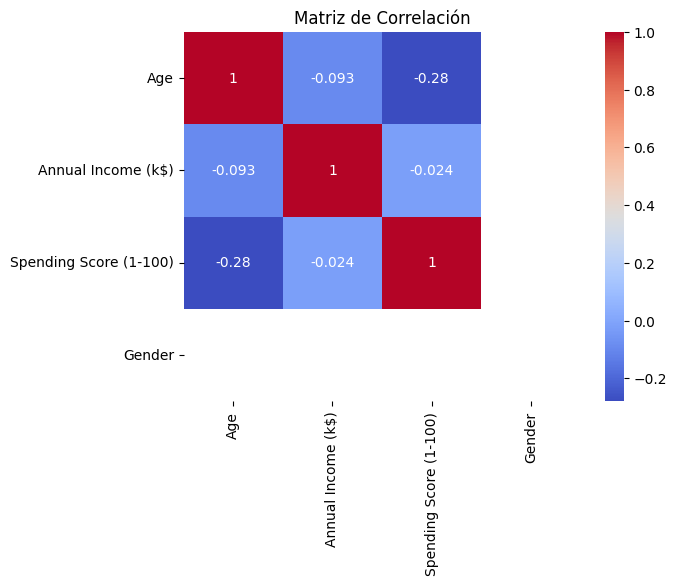

In [23]:
# Filtrar solo las columnas numéricas
numeric_df = df[df['Gender']==0][['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']].select_dtypes(include=[np.number])

# Matriz de Correlación para identificar relaciones lineales entre variables numéricas
print("\nGenerando Matriz de Correlación para hombres:")
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

1. No hay correlación entre edad e ingreso, o entre ingreso y Score.
2. Correlación negativa entre edad y Score.
3. A diferencia de las otras matrices (del dataset de los petalos), donde las especies se parecían entre si, pero al agregarlas las correlaciones cambiaban (indicador de usar FE en una regresion, e incorporar las especies al analisis), aca no hay ni grandes diferences entre generos, ni agregarlos cambia demasiado.


Generando Gráfico de Coordenadas Paralelas:


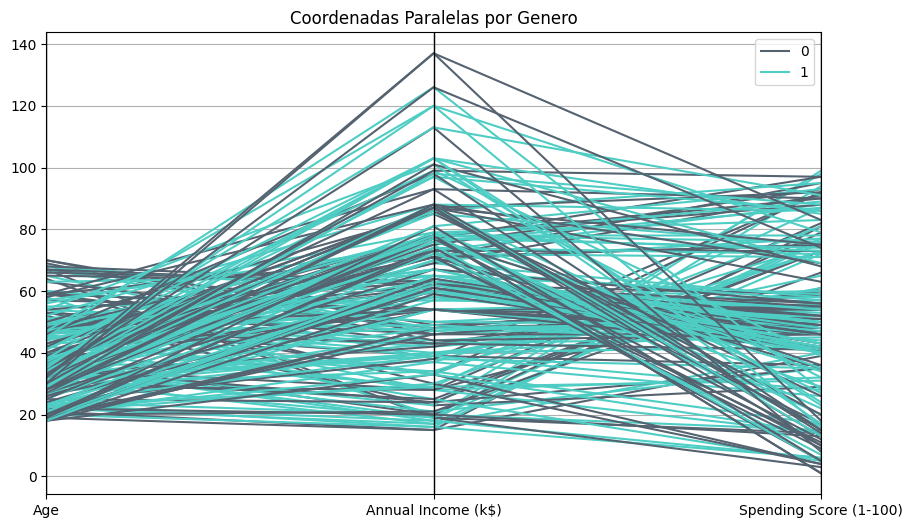

In [24]:
# Gráfico de Coordenadas Paralelas para visualizar relaciones multivariadas
from pandas.plotting import parallel_coordinates

print("\nGenerando Gráfico de Coordenadas Paralelas:")
plt.figure(figsize=(10, 6))
parallel_coordinates(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']], class_column='Gender', cols=df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']].columns[:-1], color=('#556270', '#4ECDC4', '#C7F464'))
plt.title('Coordenadas Paralelas por Genero')
plt.show()


La distribución de las variables, dentro de cada fila, no parece seguir ningún patrón diferente para hombres y para mujeres